## Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


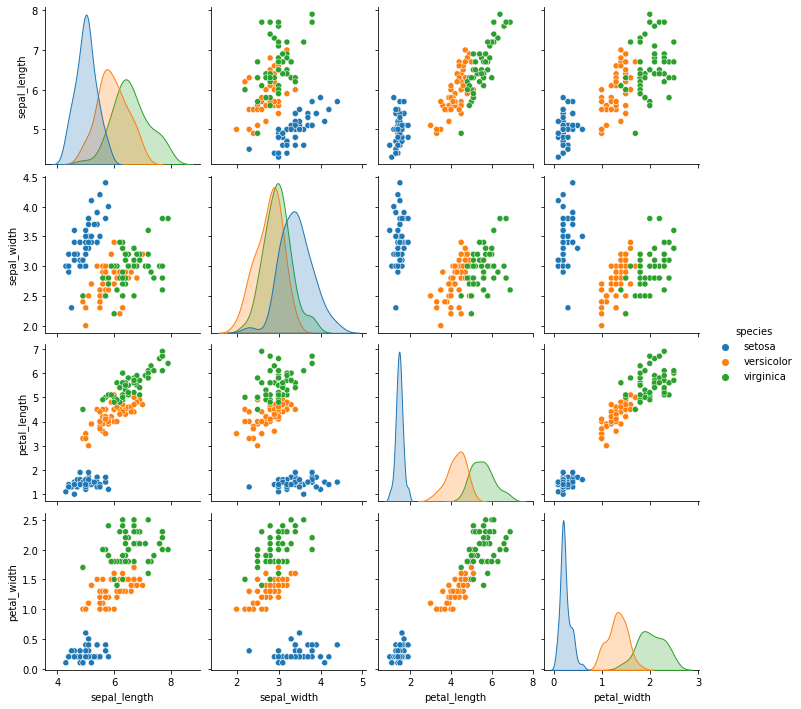

In [5]:
sns.pairplot(df, hue = "species");

In [6]:
X = df.drop("species", axis=1)

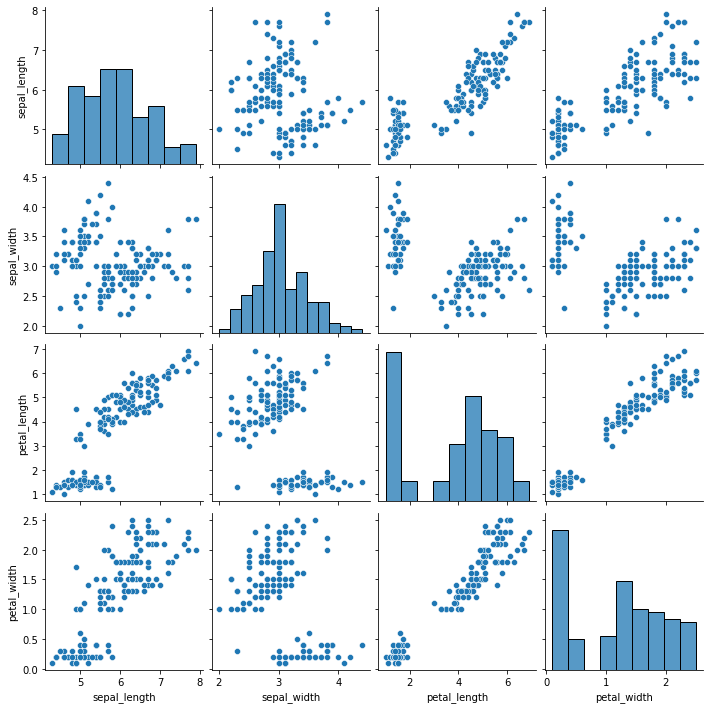

In [7]:
sns.pairplot(X);

### Hopkins Test

- Hopkins test, a statistical test for randomness of a variable.
- Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
- The more close 0, the more available to separate clusters

In [8]:
from pyclustertend import hopkins

In [9]:
hopkins(X, X.shape[0])

0.16640154143369185

In [ ]:
# Not: Eğer datamızdaki veriler arasında fazla bir fark yok ise veya aynı metrikler yok ise scale işlemi uygulamamak daha iyidir. Çünkü gerçek değerlerin kullanılması daha iyi sonuçlar verir. 

### Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
# dendrogram()

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


In [10]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")
# linkage fonksiyonu cluster için, dendrogram ise grafiği oluşturmak için kullanılıyor.

210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [165.0, 165.0, 184.375, 184.375],
  [67.65625, 67.65625, 174.6875, 174.6875],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [335.0, 335.0, 345.0, 345.0],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [340.0, 340.0, 362.5, 362.5],
  [303.75, 303.75, 351.25, 351.25],
  [272.5, 272.5, 327.5, 327.5],
  [405.0, 405.0, 415.0, 415.0],
  [395.0, 395.0, 410.0, 410.0],
  [385.0, 385.0, 402.5, 402.5],
  [425.0, 425.0, 435.0, 435.0],
  [445.0, 445.0, 455.0, 455.0],
  [485.0, 485.0, 495.0, 495.0],
  [475.0, 475.0, 490.0, 490.0],
  [465.0, 465.0, 482.5, 482.5],
  [450.0, 450.0, 473.75, 473.75],
  [430.0, 430.0, 461.875, 461.875],
  [393.75, 393.75, 445.9375, 445.9375],
  [300.0, 300.0, 419.84375, 

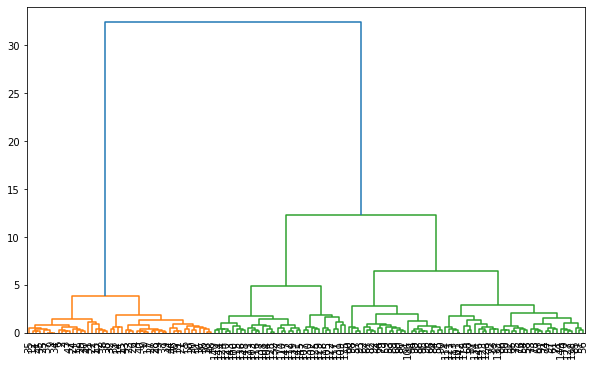

In [11]:
dendrogram(hc_ward,leaf_font_size = 10) 
# hc_ward bizim Z değerimiz

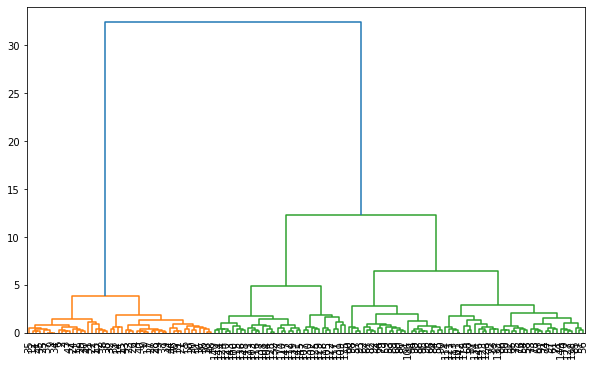

In [12]:
dendrogram(hc_ward,leaf_font_size = 10); 
# Sona ; konulması yukarıdaki gibi tüm değerlerin gösterilmesini engelliyor. 

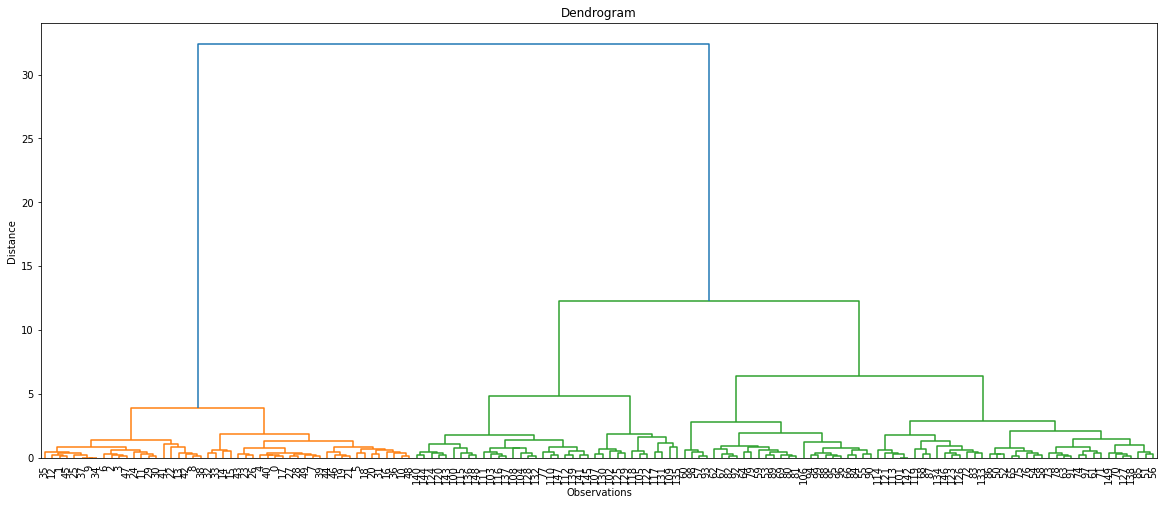

In [13]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

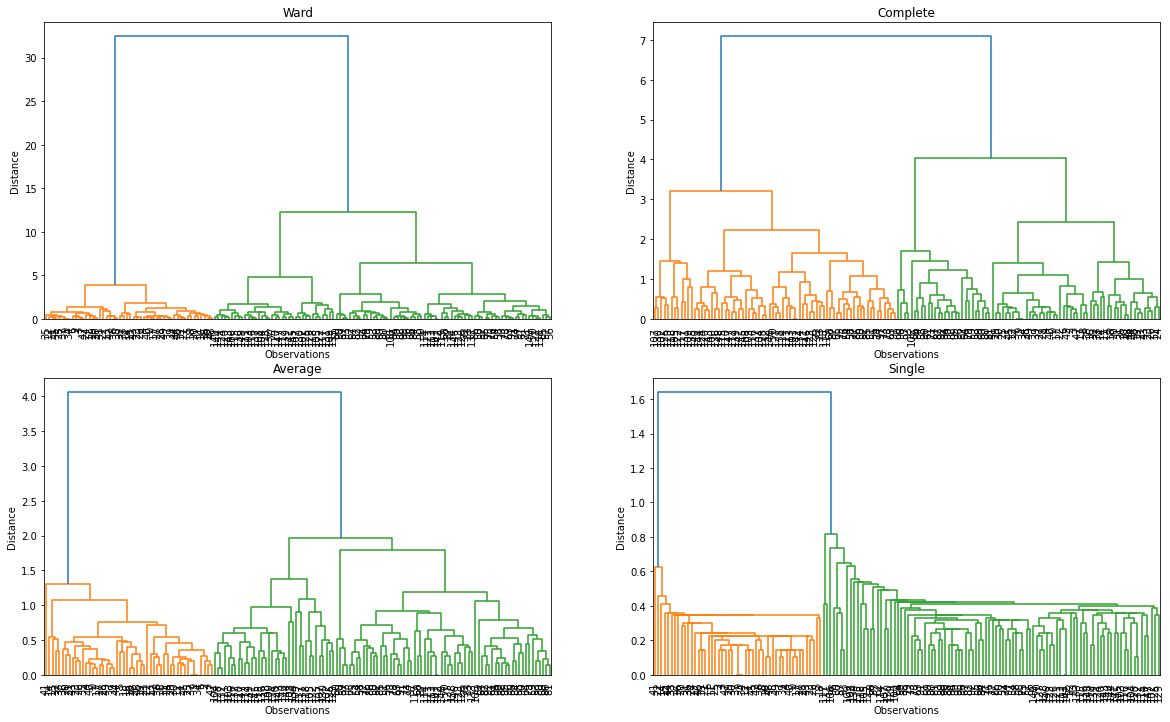

In [14]:
plt.figure(figsize = (20,12))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

# (ward) variance karesi alarak oluşturduğu için cluster lar arası mesafe (y ekseni değeri) daha fazla oluyor ve genellikle "ward" kullanılıyor.
# Cluster sayımızı belirlerken oluşturulan cluster şekillerinin y eksenindeki değerler arası en uzak olan moktaların arasından yatay bir çizgi çekerek bu çizgiyi dikey kesen çizgi sayısı bize cluster sayımızı veriyor. 

### Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distanc

In [15]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- Her veri için iki uzaklığı baz alır. Bu uzaklıklardan ilki verinin bulunduğu kümeye ait diğer verilere olan uzaklıkların ortalamasıdır. İkincisi veriye en yakin komsu kümenin tum verilerine olan uzaklıkların ortalamasıdır.

In [18]:
from sklearn.metrics import silhouette_score

In [21]:
K = range(2,10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.6863930543445408
Silhouette Score for 3 clusters: 0.5540972908150553
Silhouette Score for 4 clusters: 0.4887398491004218
Silhouette Score for 5 clusters: 0.4841553526240121
Silhouette Score for 6 clusters: 0.3618845152256815
Silhouette Score for 7 clusters: 0.34485408962742314
Silhouette Score for 8 clusters: 0.3462405312208591
Silhouette Score for 9 clusters: 0.33313850659637134


In [22]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [23]:
model1.labels_
# Cluster modellerinde (labels_) ve (fit_predict(X)) aynı deperleri verir.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

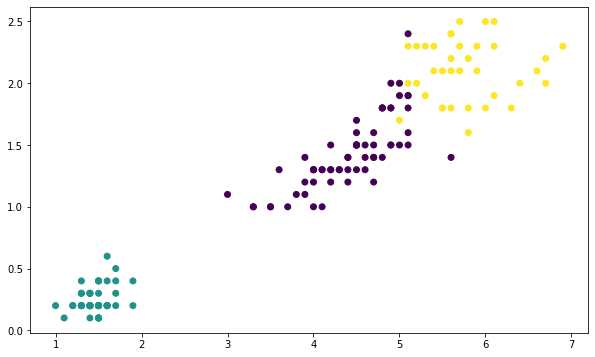

In [24]:
plt.scatter(df.iloc[:,2], df.iloc[:,3], c = model1.labels_, cmap = "viridis")

In [26]:

map_dict = {"virginica":2,
            "setosa":1,
            "versicolor": 0}

df["original_classes"]= df.species.map(map_dict)

AttributeError: 'DataFrame' object has no attribute 'predicted_clusters'

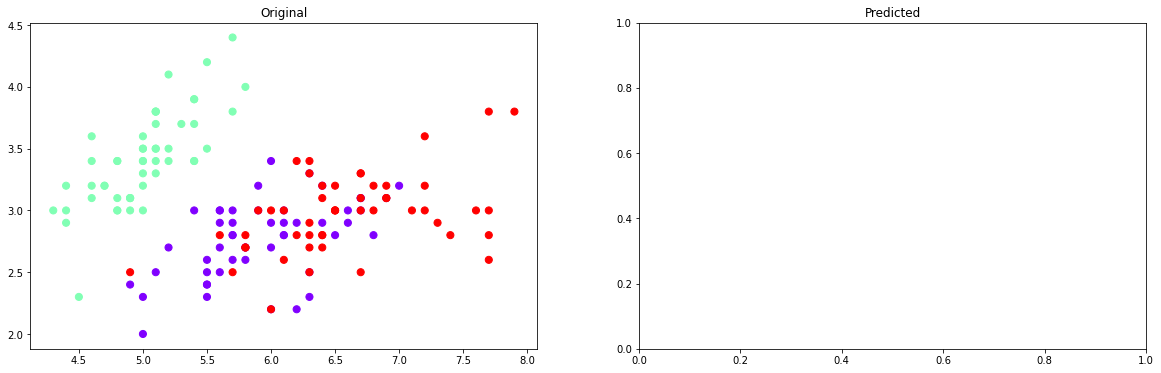

In [30]:
plt.figure(figsize = (20,6))
plt.subplot(121)
plt.title("Original")
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.original_classes, s = 50, cmap = "rainbow")
plt.subplot(122)
plt.title("Predicted")
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, s = 50, cmap = "rainbow");

AttributeError: 'DataFrame' object has no attribute 'predicted_clusters'

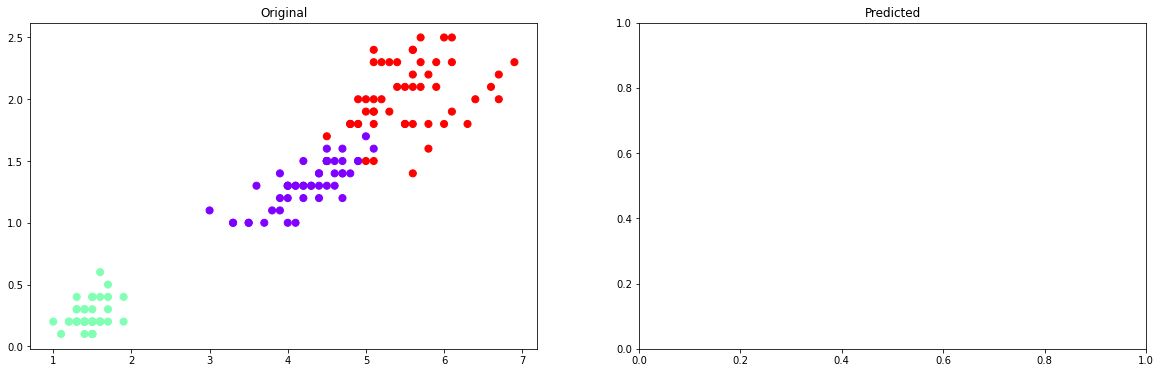

In [35]:
plt.figure(figsize = (20,6))
plt.subplot(121)
plt.title("Original")
plt.scatter(df.iloc[:,2], df.iloc[:,3], c = df.original_classes, s = 50, cmap = "rainbow")
plt.subplot(122)
plt.title("Predicted")
plt.scatter(df.iloc[:,2], df.iloc[:,3], c = df.predicted_clusters, s = 50, cmap = "rainbow");

### ARI Score

- The Adjusted Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The value of ARI indicates no good clustering if it is close to zero or negative, and a good cluster if it is close to 1.

In [ ]:
adjusted_rand_score(df['species'], df['predicted_clusters'])
adjusted_rand_score(df['original_classes'], df['predicted_clusters'])

In [ ]:
clus_pred = df.iloc[:, [0, 1, 2, 3, 5]].groupby("predicted_clusters").mean().T
clus_pred

### Remodeling According To Discriminating Features

In [36]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,original_classes
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [37]:
clus_pred = df.iloc[:, [0, 1, 2, 3, 5]].groupby("predicted_clusters").mean().T
clus_pred

KeyError: 'predicted_clusters'

### Hopkins Test

### Dendrogram

In [38]:
hc_ward = linkage(y = Z, method = "ward")
hc_complete = linkage(Z, "complete")
hc_average = linkage(Z, "average")
hc_single = linkage(Z, "single")

NameError: name 'Z' is not defined

In [ ]:
plt.figure(figsize = (20,12))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)
plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)
plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)
plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### S(Silhouette) Score

In [39]:
K = range(2,10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(Z)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(Z, model.labels_)}')

NameError: name 'Z' is not defined

In [ ]:
model2 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model2.fit_predict(Z)

In [ ]:
Z["species"] = df["species"]
Z["predicted_clusters"] = clusters
Z

In [ ]:
Z_ct = pd.crosstab(Z["predicted_clusters"], Z["species"])
Z_ct

In [ ]:
map_dict = {"virginica":0,
            "setosa":1,
            "versicolor": 2}

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(121)
plt.title("Original")
plt.scatter(Z.iloc[:,0], Z.iloc[:,1], c = Z.original_classes, s = 50, cmap = "rainbow")
plt.subplot(122)
plt.title("Predicted")
plt.scatter(Z.iloc[:,0], Z.iloc[:,1], c = Z.predicted_clusters, s = 50, cmap = "rainbow");

### ARI Score